In [49]:
import pandas as pd  



In [50]:
df = pd.read_csv('Student_performance_data .csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [51]:
def assign_grade(gpa):
    if gpa >= 3.5:
        return 'A'
    elif 3.0 <= gpa < 3.5:
        return 'B'
    elif 2.5 <= gpa < 3.0:
        return 'C'
    elif 2.0 <= gpa < 2.5:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['GPA'].apply(assign_grade)

df.head(10)




,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Grade
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,C
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,B
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,F
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,D
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,F
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0,B
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0,C
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0,F
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0,C
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0,A


In [52]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_grid(total_plots, columns_per_row=5):
    """Calculates the grid dimensions for subplots."""
    rows = math.ceil(total_plots / columns_per_row)
    columns = min(total_plots, columns_per_row)
    return rows, columns

def Plot_Histograms(x_data, y_data, title=None, figsize=(15, 5), columns_per_row=5):
    """Plots histograms for each dataset in y_data, aligned with x_data if needed."""

    num_rows, num_columns = calculate_grid(len(y_data), columns_per_row)
    print(f'DATA={len(y_data)}')

    fig, axs = plt.subplots(num_rows, num_columns, figsize=(figsize[0], figsize[1] * num_rows))

    if num_rows == 1:
        axs = np.array([axs])

    for i, yn in enumerate(y_data):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          ax = axs[row, col]
        else:
          ax = axs[0,col]

        ax.set_title(yn, fontsize=12)
        ax.set_xlabel('Grade', fontsize=10) # Using yn as x label, you can change this.
        ax.set_ylabel('Frequency', fontsize=10)
        ax.hist(y_data[yn], bins=10, alpha=0.7, color='skyblue', edgecolor='black')

        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=8)

    for i in range(len(y_data), num_rows * num_columns):
        row = i // columns_per_row
        col = i % columns_per_row

        if num_rows > 1:
          fig.delaxes(axs[row, col])
        else:
          fig.delaxes(axs[0,col])

    if title is not None:
        fig.suptitle(title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

DATA=9


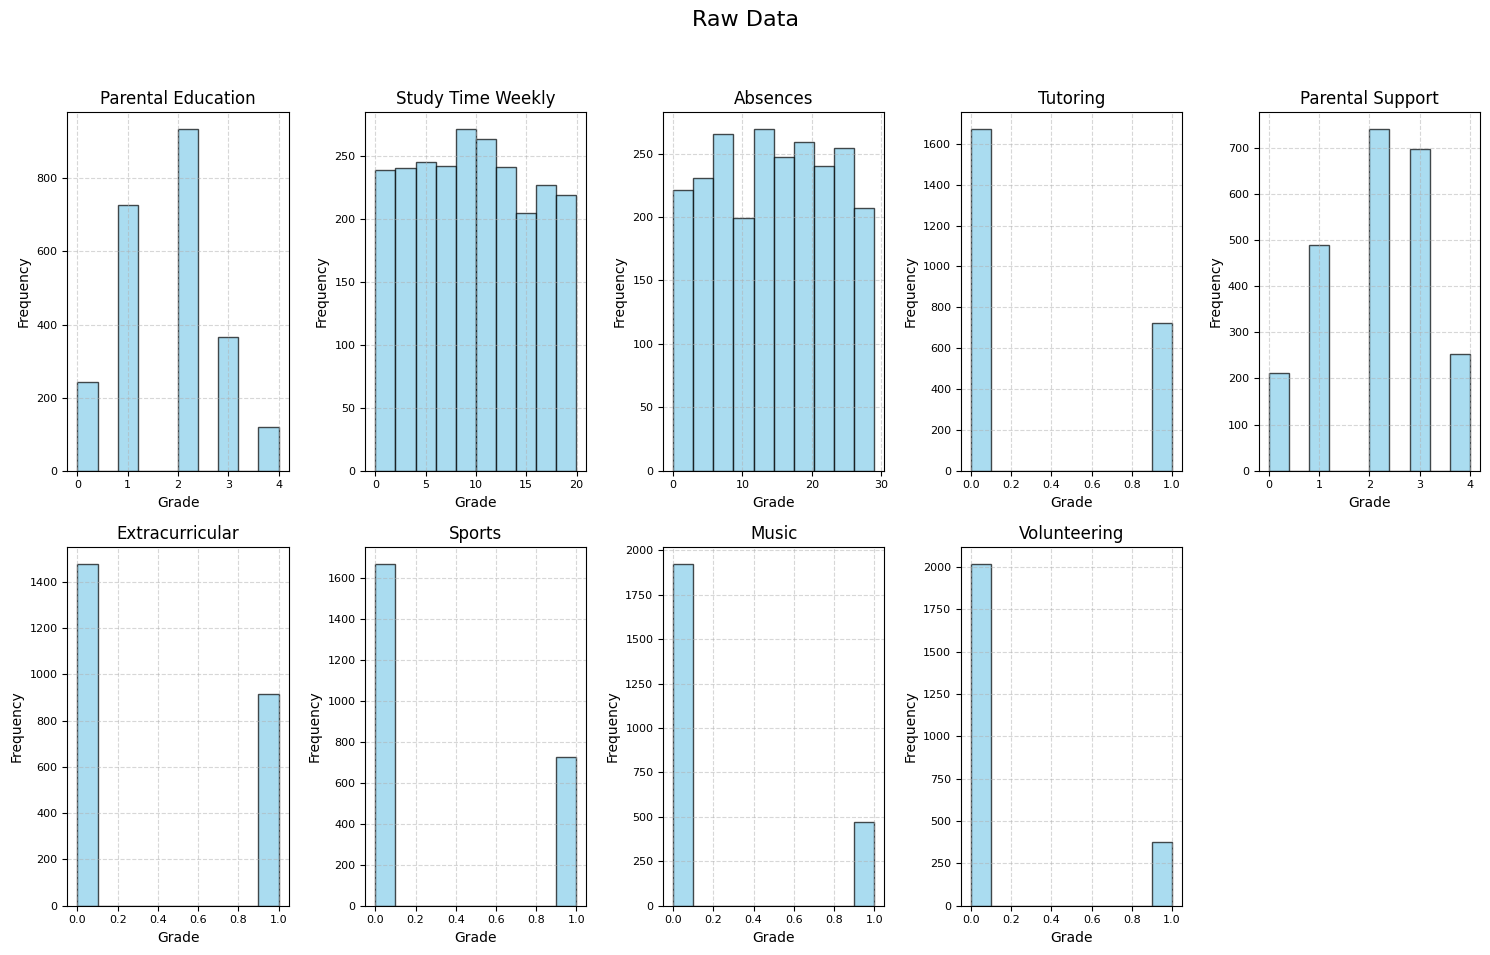

In [53]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2 = np.array(df['StudyTimeWeekly'])
y3 = np.array(df['Absences'])
y4 = np.array(df['Tutoring'])
y5= np.array(df['ParentalSupport'])
y6 = np.array(df['Extracurricular'])
y7 = np.array(df['Sports'])
y8 = np.array(df['Music'])
y9 = np.array(df['Volunteering'])

y = {'Parental Education' : y1, 'Study Time Weekly' : y2, 'Absences' : y3, 'Tutoring' : y4,'Parental Support' : y5, 'Extracurricular' : y6, 'Sports' : y7, 'Music' : y8, 'Volunteering': y9}

Plot_Histograms(x,y, title = 'Raw Data')

This data analysis shows us that extracurricular and tutoring can be dropped with the skew data. Maybe after sorting the data we can re-attempt them but as of now we drop them. Study time and absence needs further inspection, but they do not have any relationship with the grade directly.

In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


DATA=2


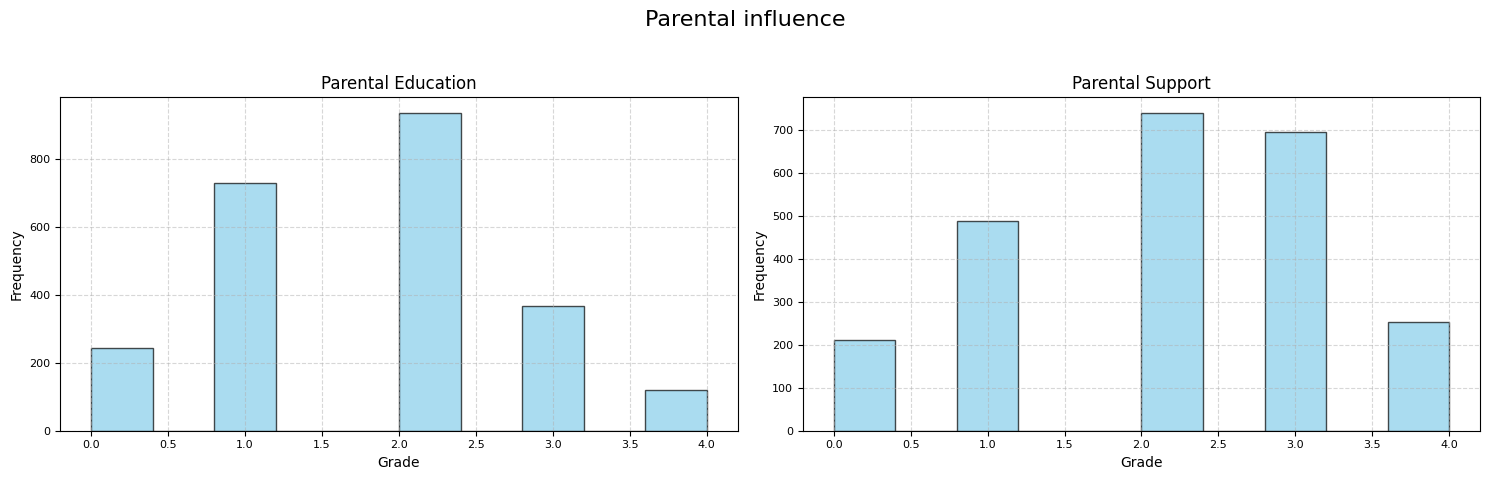

In [55]:
x = np.array(df['Grade'])
y1= np.array(df['ParentalEducation'])
y2= np.array(df['ParentalSupport'])

y = {'Parental Education' : y1, 'Parental Support' : y2}

Plot_Histograms(x,y, title = 'Parental influence')

We can see signs that parental education has a positive trend for students up to C but the students that are B and up are adapted enough to school to not need parental education.

Same with the parental support but it also includes B students.

Thus, contacting parents regarding their influence we can identify early who might need extra help.

We can see that linear regression can be used with absence and grade the more absent the less grade.

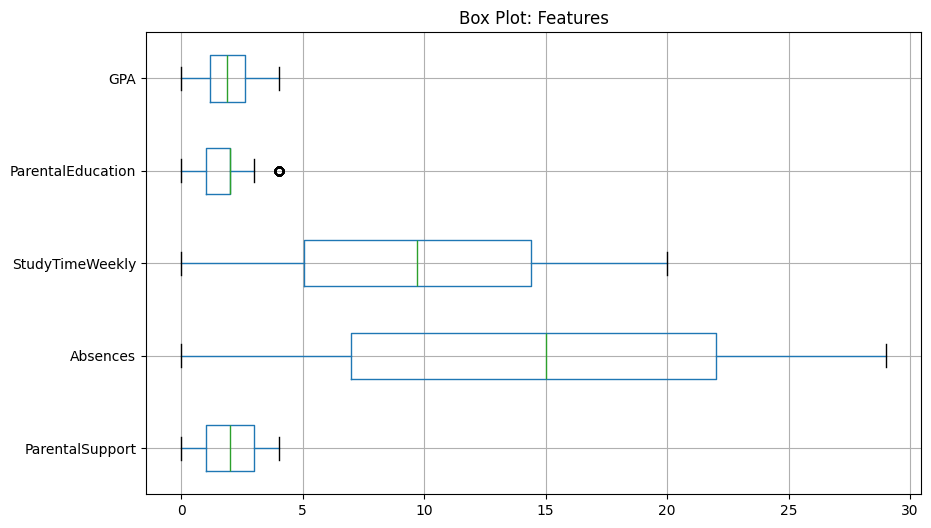

In [56]:
features = ['ParentalSupport','Absences','StudyTimeWeekly','ParentalEducation','GPA']

fig, ax = plt.subplots(figsize=(10,6))
boxplot = df[features].boxplot(vert = False, ax=ax)  
_ = ax.set_title('Box Plot: Features')